In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sys

In [2]:

dir = "./data/"
credit = pd.read_csv(dir+"data4columbia_credit.csv")
credit.columns = ['company','date', 'data']
credit.date = pd.to_datetime(credit.date)
pivot_credit = pd.pivot_table(credit, values="data", index="date", columns="company")
pivot_credit = pivot_credit.fillna(0)


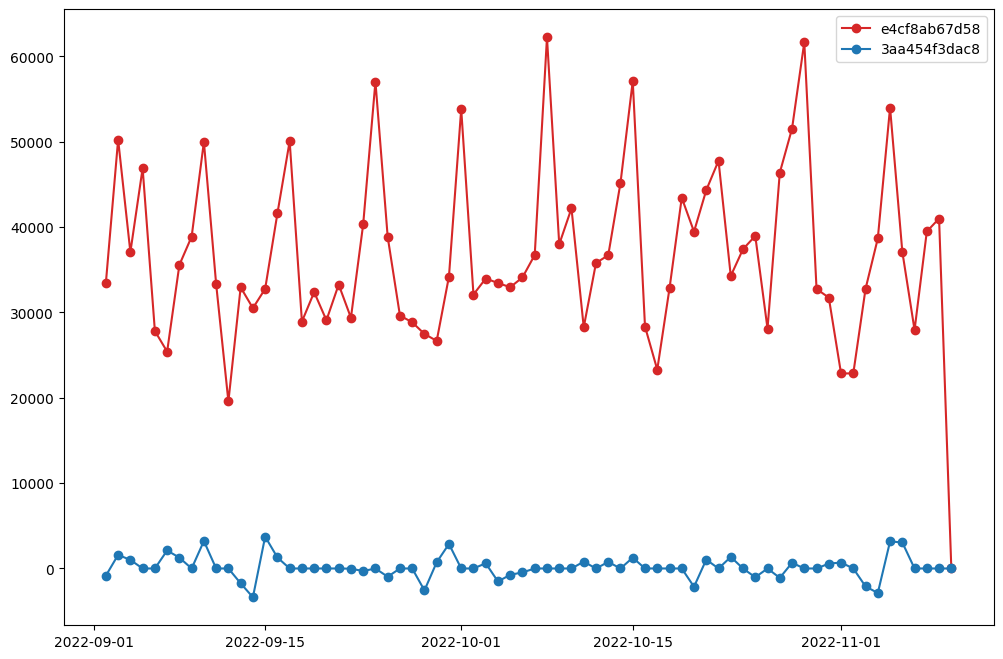

In [3]:
# visualize (compare) two companies at a time
x = pivot_credit["e4cf8ab67d58"][-70:]
y = pivot_credit["3aa454f3dac8"][-70:]

plt.figure(figsize=(12, 8))
plt.plot(x, "-o", c="C3")
plt.plot(y, "-o", c="C0")
plt.legend([x.name, y.name])

Step 2: Preprocessing

The data is structured, it was collected by a ERP system,
therefore we don't need imputation techniques.
On the other hand, the scale of the time series vary significantly,
and we are interested on grouping the time series according to the patterns,
therefore, we need to scale and will use two different techniques for this purpose:

Z-Score Normalization
MinMax Normalization

In [4]:
from sklearn.preprocessing import StandardScaler

# Standardizing (z-score normalization) a dataset involves rescaling the distribution of values 
# so the mean of observed values is 0 and the standard deviation is 1. 
# Taken from https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
ss = StandardScaler()
scaled_ss = ss.fit_transform(pivot_credit[-70:])
df_ss = pd.DataFrame(scaled_ss, columns=pivot_credit[-70:].columns, index=pivot_credit[-70:].index)
X_ss = df_ss.values
df_ss.head()

company,049fd91f3b99,07cdb4720792,0c228e9c216d,14df23d5c670,1bf8650b1b9b,22328d65a8ae,23f7ce412c07,2ff31a494062,3aa454f3dac8,3b96a09269c5,...,dfe2fbf1ed01,e2415cb7f63d,e4cf8ab67d58,ef1bcca724f3,f574a75b2605,f691ff3eb11b,f726f3251b6d,fa56db6320bb,fbf6609a606c,fdfb7a6e49cf
date,,,,,,,,,,,,,,,,,,,,,
2022-09-02,-0.010202,0.771583,0.638931,-1.111926,4.324817,1.294988,0.187875,1.970750,-0.768996,-2.036770,...,1.835739,0.554732,-0.306574,-0.474317,-1.028881,-0.542908,-0.802518,0.129008,0.141565,0.700155
2022-09-03,0.069863,1.023882,-0.102555,-0.653330,-0.831246,2.859711,0.908604,1.482495,1.132478,-1.116197,...,0.215088,-0.118146,1.315680,0.361595,0.879496,-0.217070,-0.421095,-1.123110,2.069675,1.511912
2022-09-04,-0.217437,-0.319899,-1.556366,1.831910,-0.879843,-0.251715,2.281088,1.622602,0.671493,-0.516013,...,-0.977664,-0.877211,0.042072,1.582787,0.694435,-0.057478,1.027372,-0.890695,2.575064,2.976268
2022-09-05,-0.154081,0.923905,-0.066029,0.247183,-0.243878,0.430080,0.602950,1.332674,-0.111768,0.964570,...,-0.309630,-0.633762,0.991435,0.746044,0.374542,-0.372195,2.254213,-0.757848,1.318781,0.551556
2022-09-06,-0.092950,-0.956963,0.820839,-0.082746,0.612051,-0.164002,2.561315,-0.431997,-0.111768,-1.676458,...,-0.288283,0.446077,-0.849578,-0.649983,1.644571,-0.542908,0.012915,2.353458,-0.844950,-0.724645


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.
# Taken from https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
mm = MinMaxScaler()
scaled_mm = mm.fit_transform(pivot_credit[-70:])
df_mm = pd.DataFrame(scaled_mm, columns=pivot_credit[-70:].columns, index=pivot_credit[-70:].index)
X_mm = df_mm.values
df_mm.head()

company,049fd91f3b99,07cdb4720792,0c228e9c216d,14df23d5c670,1bf8650b1b9b,22328d65a8ae,23f7ce412c07,2ff31a494062,3aa454f3dac8,3b96a09269c5,...,dfe2fbf1ed01,e2415cb7f63d,e4cf8ab67d58,ef1bcca724f3,f574a75b2605,f691ff3eb11b,f726f3251b6d,fa56db6320bb,fbf6609a606c,fdfb7a6e49cf
date,,,,,,,,,,,,,,,,,,,,,
2022-09-02,0.212663,0.849517,0.598291,0.263120,1.000000,0.740333,0.433654,1.000000,0.356346,0.000000,...,1.000000,0.606306,0.537439,0.427844,0.383897,0.023885,0.453106,0.571826,0.392108,0.575172
2022-09-03,0.223737,0.884974,0.450187,0.358327,0.035620,0.994846,0.574149,0.925841,0.699266,0.196204,...,0.812178,0.476310,0.807438,0.593635,0.763004,0.084438,0.512479,0.330811,0.873753,0.726684
2022-09-04,0.183999,0.696128,0.159804,0.874276,0.026530,0.488751,0.841696,0.947121,0.616130,0.324122,...,0.673946,0.329662,0.595466,0.835841,0.726241,0.114097,0.737953,0.375548,1.000000,1.000000
2022-09-05,0.192762,0.870924,0.457482,0.545278,0.145480,0.599650,0.514567,0.903085,0.474874,0.639682,...,0.751366,0.376695,0.753472,0.669885,0.662693,0.055610,0.928928,0.401119,0.686178,0.547437
2022-09-06,0.201218,0.606600,0.634625,0.476783,0.305571,0.503018,0.896322,0.635056,0.474874,0.076794,...,0.753840,0.585315,0.447064,0.393003,0.914988,0.023885,0.580039,1.000000,0.145675,0.309239


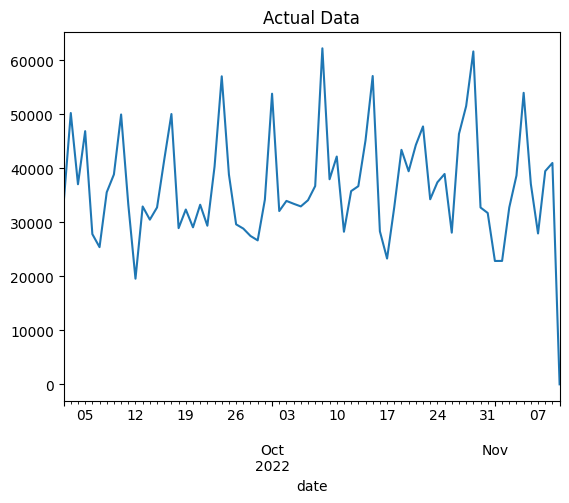

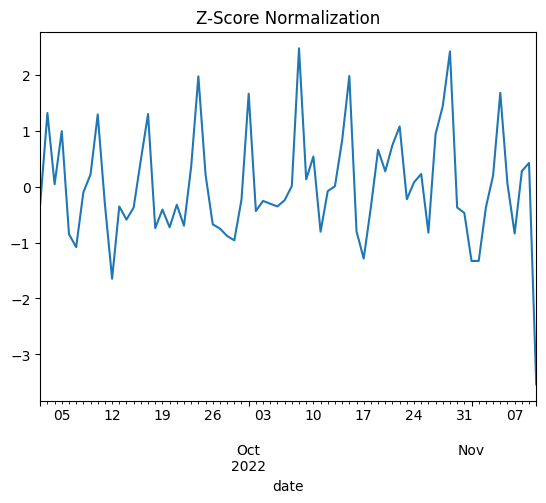

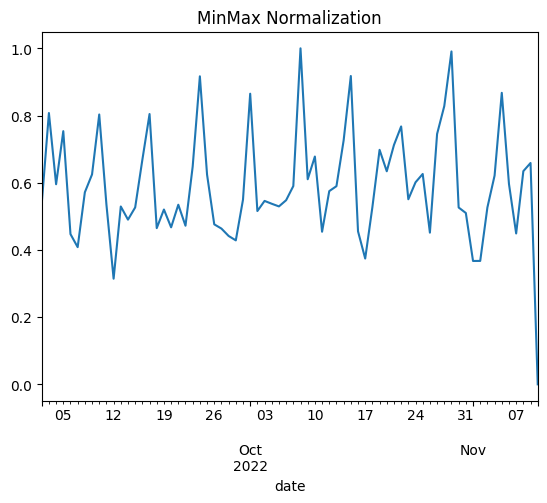

(<AxesSubplot:title={'center':'MinMax Normalization'}, xlabel='date'>, None)

In [6]:
# Select a company Id to compare normal data with scaled data
company = "e4cf8ab67d58"

# Visualize the sales (qty) for the product
pivot_credit[company][-70:].plot(title="Actual Data"), plt.show()
df_ss[company].plot(title="Z-Score Normalization"), plt.show()
df_mm[company].plot(title="MinMax Normalization"), plt.show()

Euclidean Distance implementation

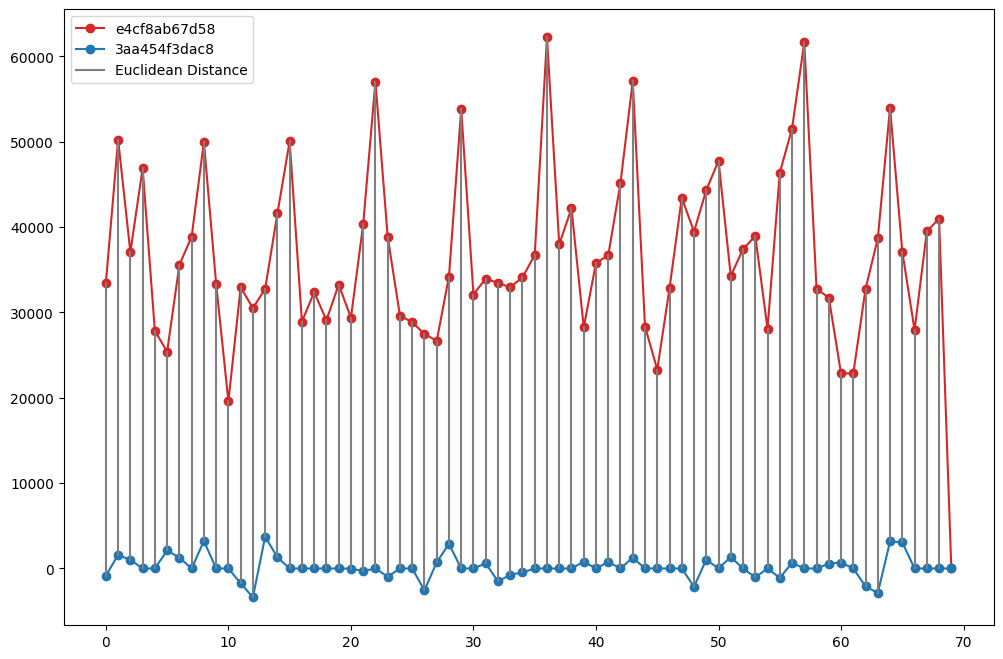

In [7]:
# visualize 
x = pivot_credit["e4cf8ab67d58"][-70:]
y = pivot_credit["3aa454f3dac8"][-70:]

# Graphic representation of Euclidean Distance -One to One Match
plt.figure(figsize=(12, 8))
plt.plot(np.arange(x.shape[0]), x, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y, "-o", c="C0")
for i, (x_i, y_j) in enumerate(zip(x,  y)):
    plt.plot([i, i], [x_i, y_j], c="C7")
plt.legend([x.name, y.name, "Euclidean Distance"])

I dont know this part, just tried some core functions out of the package (DTW implementation using DTW-python package)

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



<AxesSubplot:>

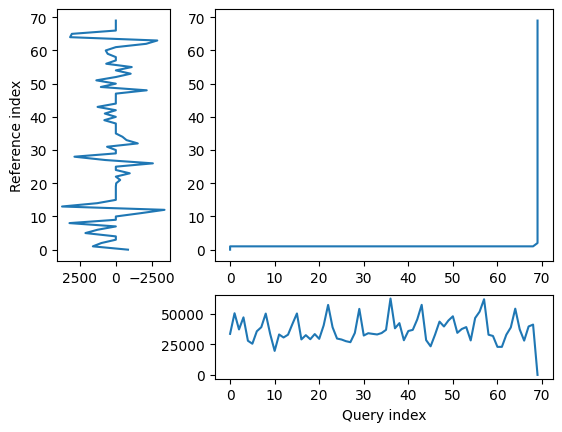

In [8]:
## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(x, y, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

DTW implementation using DTW-python package

<AxesSubplot:xlabel='Index', ylabel='Query value'>

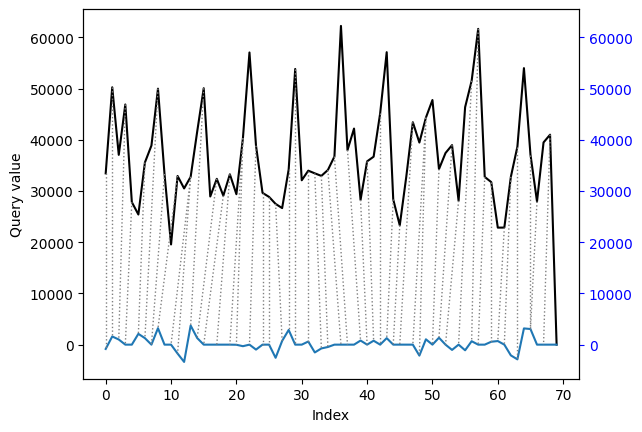

In [9]:
from dtw import *
dtw(x,y,keep_internals=True,step_pattern=rabinerJuangStepPattern(6, "c")).plot(type="twoway",offset=-2)

Found DTW implementation using Dynamic Programming

In [10]:
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as dist

def dp(dist_mat):
    """
    Find minimum-cost path through matrix `dist_mat` using dynamic programming.

    The cost of a path is defined as the sum of the matrix entries on that
    path. See the following for details of the algorithm:

    - http://en.wikipedia.org/wiki/Dynamic_time_warping
    - https://www.ee.columbia.edu/~dpwe/resources/matlab/dtw/dp.m

    The notation in the first reference was followed, while Dan Ellis's code
    (second reference) was used to check for correctness. Returns a list of
    path indices and the cost matrix.
    """

    N, M = dist_mat.shape
    
    # Initialize the cost matrix
    cost_mat = np.zeros((N + 1, M + 1))
    for i in range(1, N + 1):
        cost_mat[i, 0] = np.inf
    for i in range(1, M + 1):
        cost_mat[0, i] = np.inf

    # Fill the cost matrix while keeping traceback information
    traceback_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i, j],      # match (0)
                cost_mat[i, j + 1],  # insertion (1)
                cost_mat[i + 1, j]]  # deletion (2)
            i_penalty = np.argmin(penalty)
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            traceback_mat[i, j] = i_penalty

    # Traceback from bottom right
    i = N - 1
    j = M - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i, j]
        if tb_type == 0:
            # Match
            i = i - 1
            j = j - 1
        elif tb_type == 1:
            # Insertion
            i = i - 1
        elif tb_type == 2:
            # Deletion
            j = j - 1
        path.append((i, j))

    # Strip infinity edges from cost_mat before returning
    cost_mat = cost_mat[1:, 1:]
    return (path[::-1], cost_mat)

In [11]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

Alignment cost: 2386697.2979
Normalized alignment cost: 17047.8378


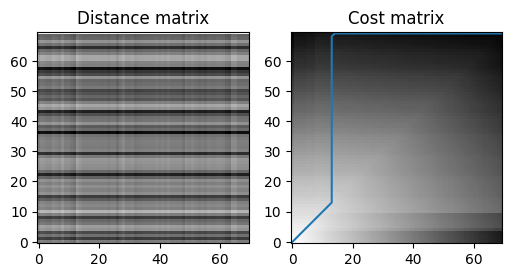

In [12]:
# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

plt.figure(figsize=(6, 4))
plt.subplot(121)
plt.title("Distance matrix")
plt.imshow(dist_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
plt.subplot(122)
plt.title("Cost matrix")
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path)

DTW implementation using dynamic-programming, looks terrible

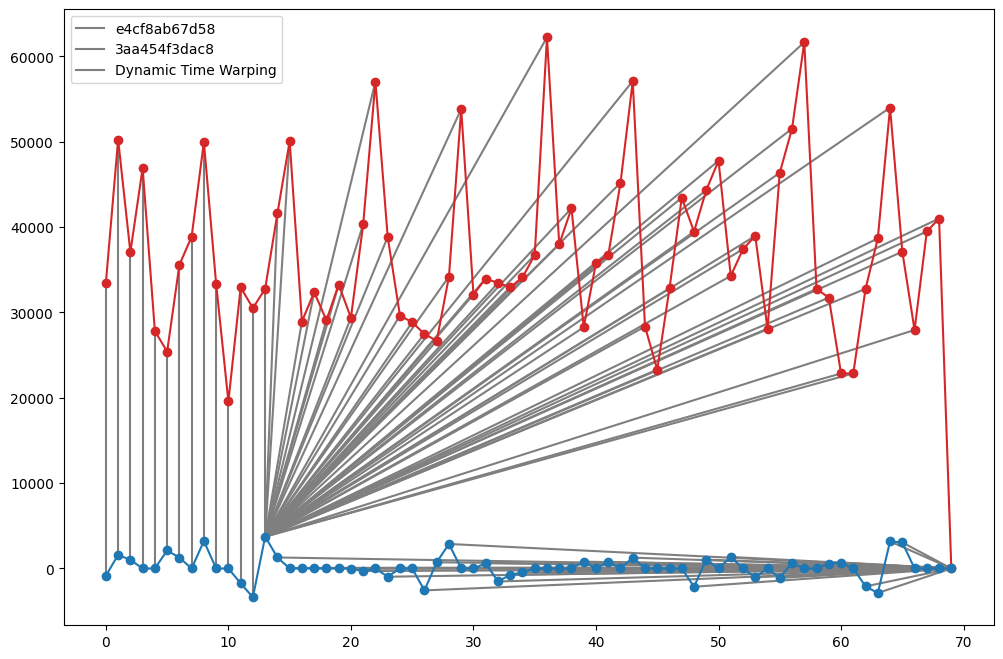

In [13]:
plt.figure(figsize=(12, 8))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i], y[y_j]], c="C7")
plt.plot(np.arange(x.shape[0]), x, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y, "-o", c="C0")
plt.legend([x.name, y.name, "Dynamic Time Warping"]);

Step 3: Use Tslearn to Calculate K-Means with DTW

In [14]:
try:
  from tslearn.clustering import TimeSeriesKMeans
  from tslearn.clustering import silhouette_score
except:
  import sys
  !{sys.executable} -m pip install tslearn
  from tslearn.clustering import TimeSeriesKMeans
  from tslearn.clustering import silhouette_score

import time

In [15]:
# Experiment number 1. (1/2)
silhoutte_score_ss = []

for i in range(2, 10):

  start = time.time()

  km = TimeSeriesKMeans(n_clusters=i, metric="dtw", max_iter=20, max_iter_barycenter=10, random_state=0)
  y_pred_ss = km.fit_predict(X_ss)
  score_ss = silhouette_score(X_ss, y_pred_ss, metric="dtw")
  silhoutte_score_ss.append(score_ss)

  stop = time.time()
  duration = stop - start

  print(f"K = {i}.", f"Took {duration:.2f} seconds to calculate.")

K = 2. Took 15.14 seconds to calculate.
K = 3. Took 5.08 seconds to calculate.
K = 4. Took 4.13 seconds to calculate.
K = 5. Took 5.79 seconds to calculate.
K = 6. Took 4.97 seconds to calculate.
K = 7. Took 5.51 seconds to calculate.
K = 8. Took 5.55 seconds to calculate.
K = 9. Took 5.56 seconds to calculate.


In [16]:
# Experiment number 1. (2/2)
silhoutte_score_mm = []

for i in range(2, 10):

  start = time.time()

  km = TimeSeriesKMeans(n_clusters=i, metric="dtw", max_iter=20, max_iter_barycenter=10, random_state=0)
  y_pred_mm = km.fit_predict(X_mm)
  score_mm = silhouette_score(X_mm, y_pred_mm, metric="dtw")
  silhoutte_score_mm.append(score_mm)

  stop = time.time()
  duration = stop - start

  print(f"K = {i}.", f"Took {duration:.2f} seconds to calculate.")

K = 2. Took 4.22 seconds to calculate.
K = 3. Took 4.56 seconds to calculate.
K = 4. Took 4.39 seconds to calculate.
K = 5. Took 4.09 seconds to calculate.
K = 6. Took 3.40 seconds to calculate.
K = 7. Took 3.81 seconds to calculate.
K = 8. Took 5.97 seconds to calculate.
K = 9. Took 5.33 seconds to calculate.


Found the most optimal K value (3)

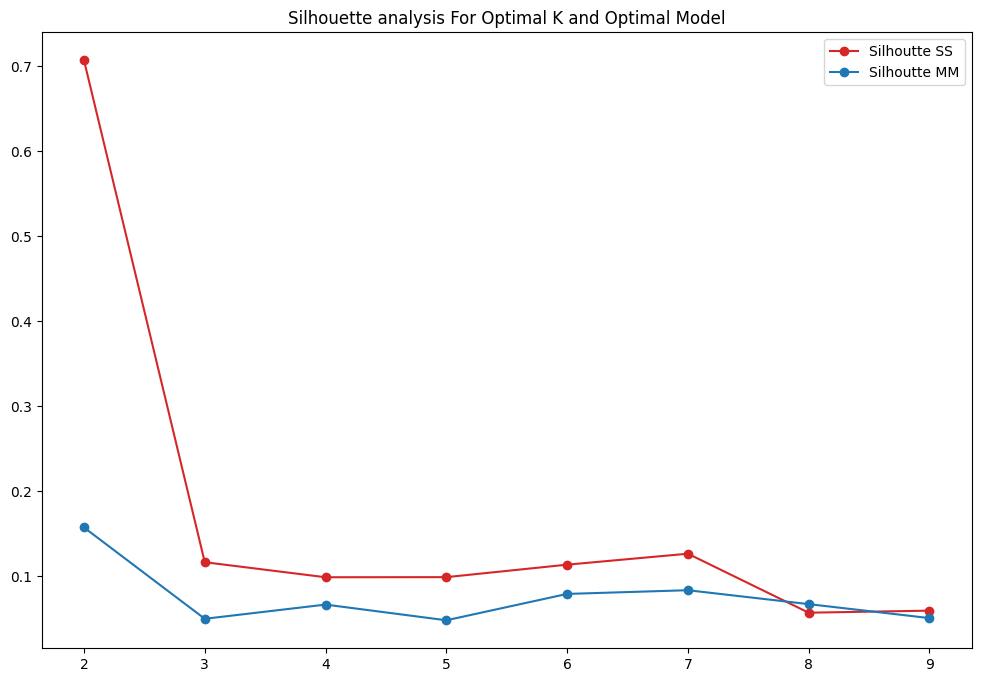

In [17]:
# Experiment number 1.
plt.figure(figsize=(12, 8))
plt.plot(range(2, 10), silhoutte_score_ss, "-o", c="C3")
plt.plot(range(2, 10), silhoutte_score_mm, "-o", c="C0")
plt.title("Silhouette analysis For Optimal K and Optimal Model")
plt.legend(["Silhoutte SS", "Silhoutte MM"]);

Step 4: Run K-Means with the normalization technique and parameters with the higher Silhouette Score

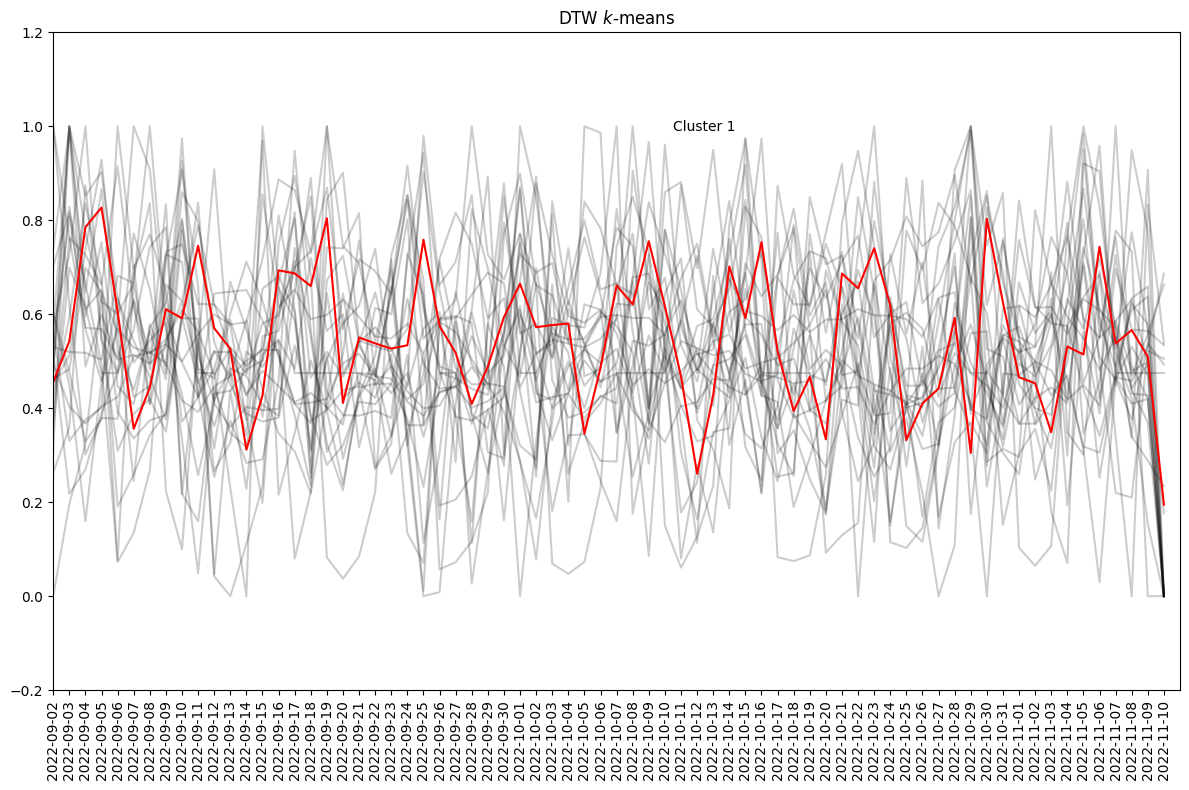

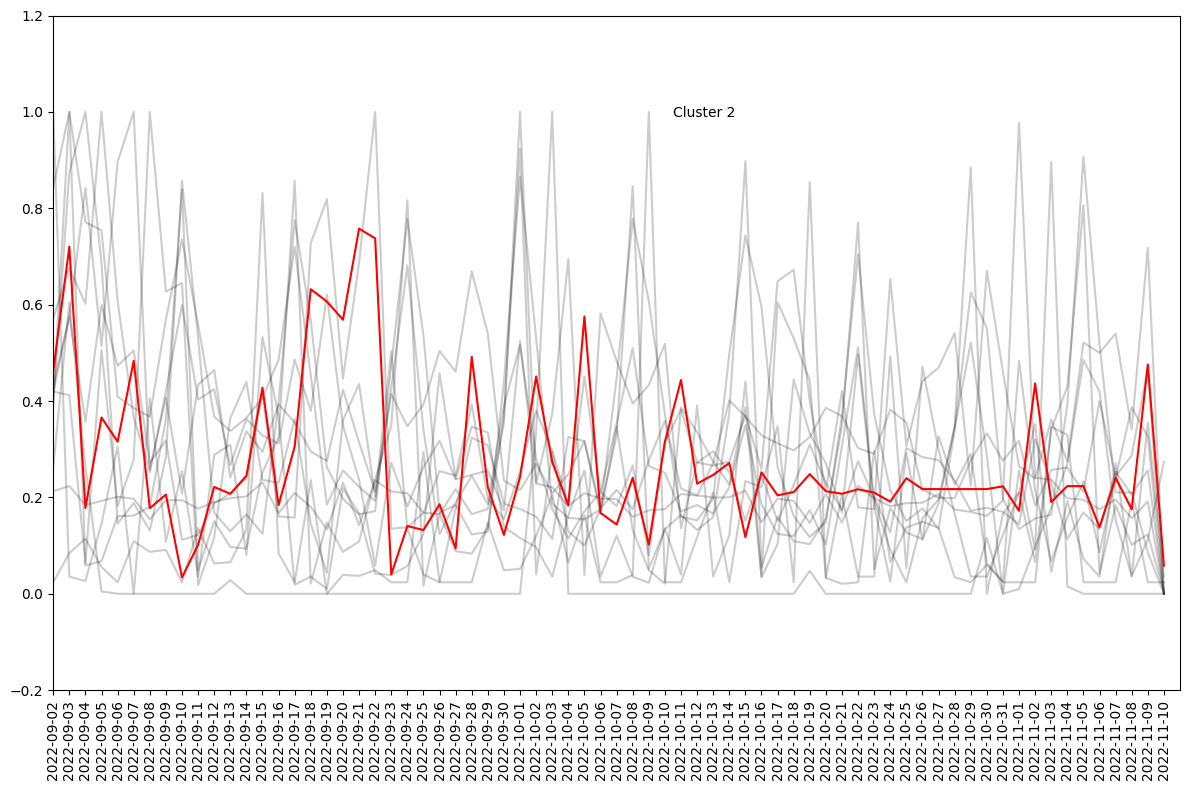

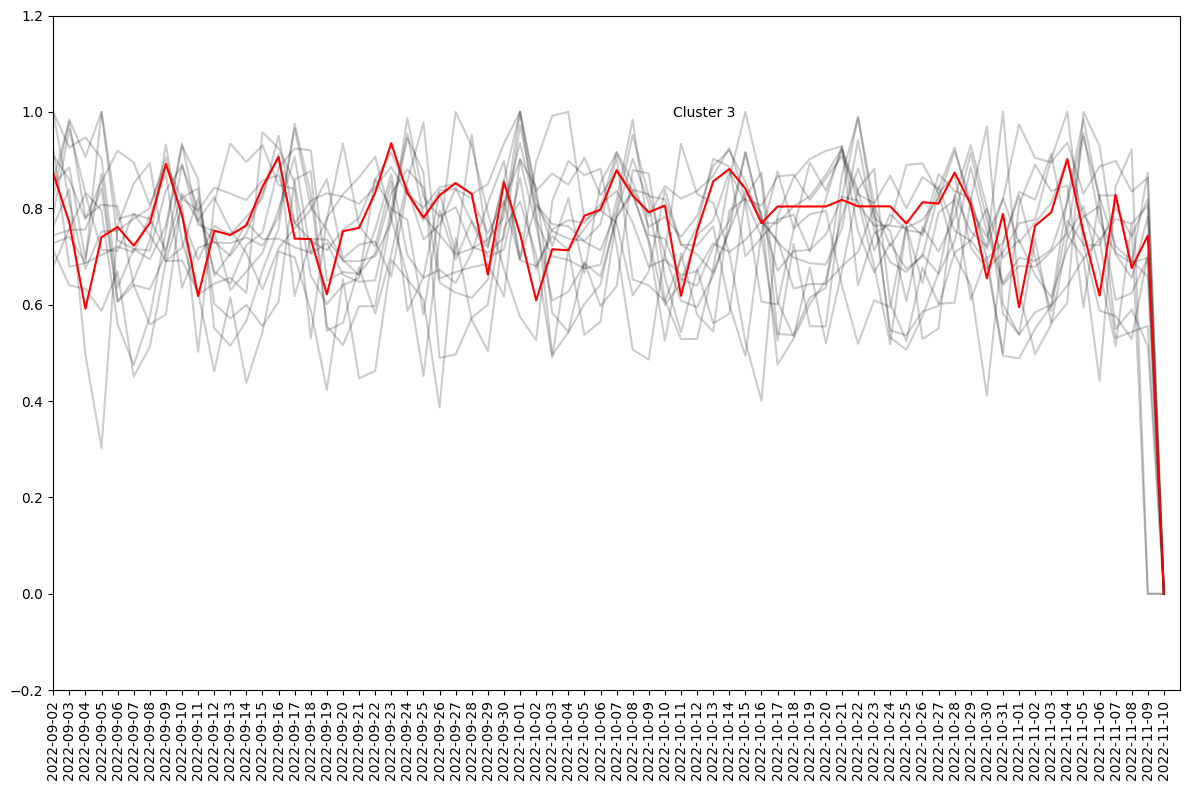

In [18]:
# Based on the Silhoutte Score the best K = , the best metric is , and the best tecnique to normalize is MinMax
X_transposed = df_mm.T.values
km = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=20, max_iter_barycenter=10, random_state=0)
y_pred_mm = km.fit_predict(X_transposed)

# Plot the clusters based on companies with the x-axis showing the time series index
for yi in range(len(np.unique(y_pred_mm))):
    # Set a larger figure size
    plt.figure(figsize=(12, 8))
    for xx in X_transposed[y_pred_mm == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, X_transposed.shape[1])
    plt.ylim(-0.2, 1.2)
    plt.xticks(range(X_transposed.shape[1]), df_mm.index.strftime('%Y-%m-%d'), rotation='vertical')  # Set x-axis tick labels as the time series index
    plt.text(0.55, 0.85, 'Cluster %d' % (yi + 1), transform=plt.gca().transAxes)
    if yi == 0:
        plt.title("DTW $k$-means")

    plt.tight_layout()
    plt.show()


In [19]:
# Create a dictionary to store the members of each cluster
cluster_members = {i: [] for i in range(len(np.unique(y_pred_mm)))}

# Iterate through the predicted cluster labels and append the company names to the corresponding cluster
for i, company in enumerate(df_mm.columns):
    cluster_members[y_pred_mm[i]].append(company)

# Print the members of each cluster
for cluster, members in cluster_members.items():
    print(f"Cluster {cluster + 1} members: {', '.join(members)}")

Cluster 1 members: 0c228e9c216d, 14df23d5c670, 22328d65a8ae, 3aa454f3dac8, 3b96a09269c5, 43b9e9b21999, 450c40bc1e47, 5cc1b4f7fbbd, 5d32d7d55415, 61bbe440bf3e, 7cc4ff7756ca, 8b8937c0ca2a, 8cf384fc5741, 9314b99e3365, a4a7c48a5224, be4cf0ff0e3c, c55bd78eb15c, e2415cb7f63d, e4cf8ab67d58, ef1bcca724f3, f574a75b2605, f726f3251b6d, fa56db6320bb, fdfb7a6e49cf
Cluster 2 members: 049fd91f3b99, 1bf8650b1b9b, 23f7ce412c07, 95d85d291db7, b691f62df5b8, b90599e97c3e, bb8b3ece0968, c04e7e38a9e2, d2ee94e6f008, f691ff3eb11b, fbf6609a606c
Cluster 3 members: 07cdb4720792, 2ff31a494062, 5d0389d3507e, 61c1c2203bec, 695b1e497540, 8418d35f7b99, 8a5419583f31, 8ded09ca1316, 97f3ac0558f3, b0cc2d105808, cf1f2a3136a8, d8b9679fad55, dfe2fbf1ed01
